In [1]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt

import keras

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # đặt kích thước mặc định cho hình
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

C:\Users\Admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10

(X_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Training data shape: ", X_train.shape)
print("Training label shape: ", y_train.shape)
print("Testing data shape: ", x_test.shape)
print("Testing label shape: ", y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training label shape:  (50000, 1)
Testing data shape:  (10000, 32, 32, 3)
Testing label shape:  (10000, 1)


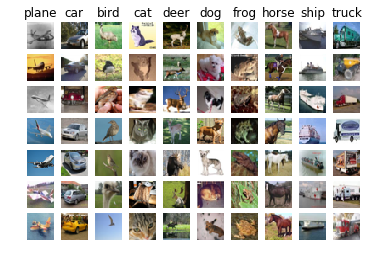

In [3]:
# Hiển thị một số ảnh từ trong bộ dữ liệu.
# Với mỗi lớp, chúng ta sẽ hiển thị một số ảnh minh họa.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [4]:
# declare variable
batch_size = 32
epochs = 1

checkpoints = os.path.join( os.getcwd(), 'checkpoints')
model_name = 'keras_cifar10_checkpoint_at' + str(epochs) + 'epochs.h5'

In [5]:
# preprocessing
# convert y to binary class matrix
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train = X_train.astype('float32')
x_test = x_test.astype('float32')
X_train /=255
x_test /=255

print("Training label shape: ", y_train.shape)
print("Training test shape: ", y_test.shape)

Training label shape:  (50000, 10)
Training test shape:  (10000, 10)


In [6]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import SGD

def cnn_model():
    
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    sgd = SGD(lr = 0.1, decay = 1e-6, momentum=0.9, nesterov=True)

    model.compile(loss='categorical_crossentropy',
                 optimizer=sgd,
                 metrics=['accuracy'])
    
    return model

cnn = cnn_model()


    

In [7]:
cnn.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 501s 10ms/step - loss: 2.3096 - acc: 0.1003 - val_loss: 2.3097 - val_acc: 0.1000


In [8]:
#save model
if not os.path.isdir(checkpoints):
    os.makedirs(checkpoints)
    
model_file = os.path.join(checkpoints, model_name)
cnn.save(model_file)

print("model at: ", model_file)


model at:  E:\Backup\Studying\ML\Machine-Learning\bigproject\checkpoints\keras_cifar10_checkpoint_at1epochs.h5


In [9]:
# Scores
scores = cnn.evaluate(x_test, y_test, verbose=1)
print("Score: ", scores)

10000/10000 [==============================] - 28s 3ms/step
Score:  [2.3096819938659667, 0.1]
